In [7]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotting

In [8]:
analytical_retardation_type = "langmuir"

In [9]:
input_dir = Path("../data")
output_dir = Path(f"../data_out/{analytical_retardation_type}/")
image_output_dir = output_dir / "images"

image_output_dir.mkdir(exist_ok=True, parents=True)

In [10]:
concentration_full = np.load(input_dir / f"FINN_forward_solver/retardation_{analytical_retardation_type}/c_train.npy")
concentration_full.shape

(2001, 2, 26)

In [11]:
Nt, _, Nx = concentration_full.shape 

x = np.linspace(0, 1, Nx)
t = np.linspace(0, 10000, Nt)

In [12]:
t[251]

1255.0

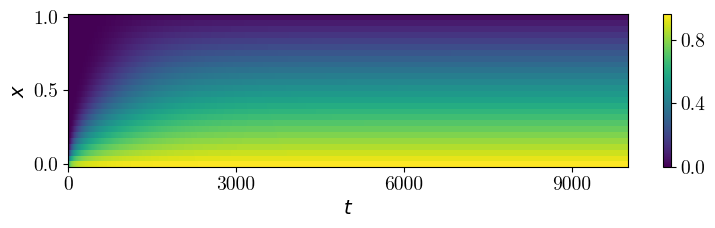

In [19]:
fig, ax = plt.subplots(figsize=(2*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))
plt.pcolor(t, x, concentration_full[:, 0, :].T)
plt.xlabel("$t$")
plt.ylabel("$x$")
# plt.title("Concentration Field $c(x,t)$")
cbar = plt.colorbar()
cbar.set_ticks([0, 0.4, 0.8])
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_full")
plotting.savefig(fig, "../paper/figs/c_diss_field_full")
plt.show() 

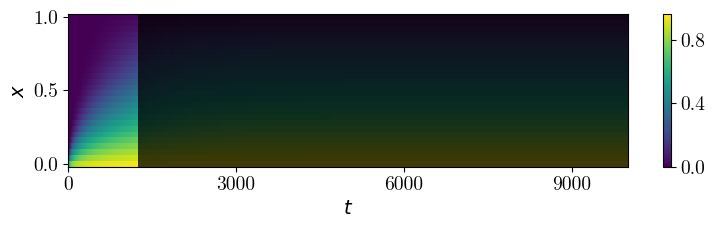

In [20]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0]), (1, [0, 0, 0, 0.75])])

fig, ax = plt.subplots(figsize=(2*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

grey_mask = np.zeros_like(concentration_full[:, 0, :].T)
grey_mask[:, 251:] = 1

cbar = plt.colorbar(ax.pcolormesh(t, x, concentration_full[:, 0, :].T, cmap="viridis"))
ax.pcolormesh(t, x, grey_mask, cmap=cmap)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
cbar.set_ticks([0, 0.4, 0.8])
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_full_black_test")
plt.show()

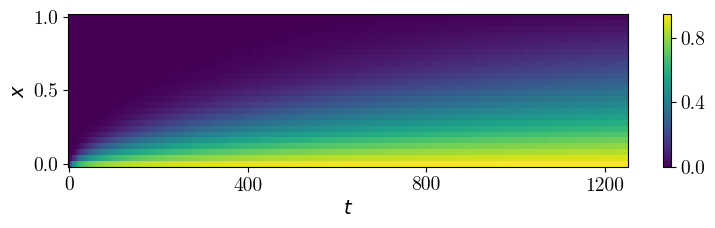

In [21]:
fig, ax = plt.subplots(figsize=(2*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

c_train = concentration_full[:251, 0, :]
t_train = t[:251]

cbar = plt.colorbar(ax.pcolormesh(t_train, x, c_train.T, cmap="viridis"))
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
cbar.set_ticks([0, 0.4, 0.8])
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_train")
plt.show()

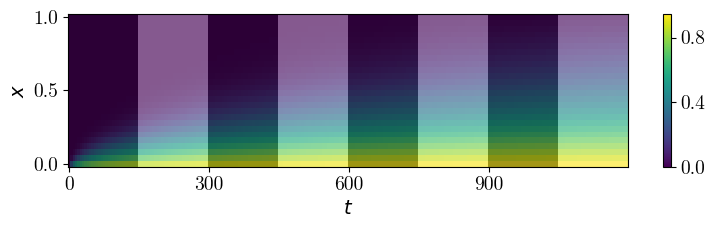

In [23]:
fig, ax = plt.subplots(figsize=(2*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

grey_mask = np.zeros_like(c_train.T)
interval_size = 30
k = 0
iteration = 0
while k+interval_size < grey_mask.shape[1]: 
    grey_mask[:, k:k+interval_size] = 1 if iteration % 2 == 0 else 0
    iteration += 1
    k += interval_size

cbar = plt.colorbar(ax.pcolormesh(t_train[:k], x, c_train[:k].T, cmap="viridis"))
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.35]), (1, [0, 0, 0, 0.35])])
ax.pcolormesh(t_train[:k], x, grey_mask[:, :k], cmap=cmap)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
cbar.set_ticks([0, 0.4, 0.8])
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_train_intervals")
plt.show()

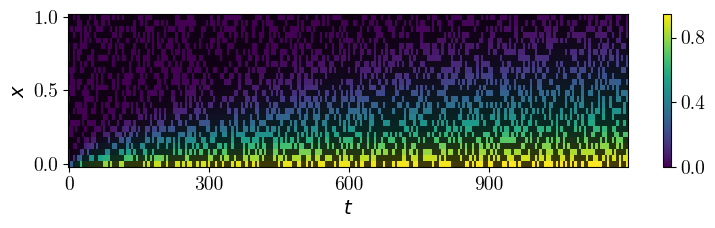

In [24]:
fig, ax = plt.subplots(figsize=(2*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

grey_mask = np.random.choice([0, 1], size=c_train.T.shape, p=[0.4, 0.6])

cbar = plt.colorbar(ax.pcolormesh(t_train[:k], x, c_train[:k].T, cmap="viridis"))
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.0]), (1, [0, 0, 0, 0.75])])
ax.pcolormesh(t_train[:k], x, grey_mask[:, :k], cmap=cmap)
ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
cbar.set_ticks([0, 0.4, 0.8])
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_train_random_subset")
plotting.savefig(fig, "../paper/figs/c_diss_field_train_random_subset")
plt.show()

In [28]:
concentration_full[:, 0, :].shape, concentration_full.shape, c_train.shape

((2001, 26), (2001, 2, 26), (251, 26))

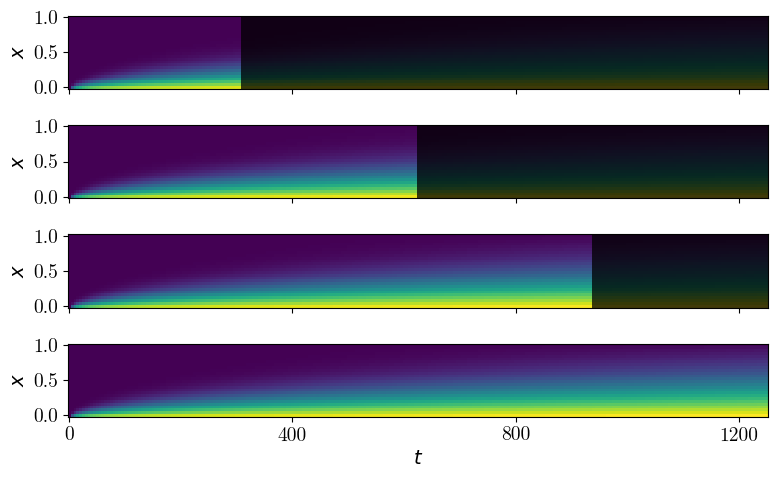

In [32]:
nrows = 4
fig, axs = plt.subplots(nrows=nrows, figsize=(2*plotting.FIGURE_WIDTH, 2*plotting.FIGURE_HEIGHT), sharex=True)

cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, [1, 1, 1, 0.0]), (1, [0, 0, 0, 0.75])])

# c0_full = concentration_full[:, 0, :]
c0_full = c_train

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 1*len(c0_full)//nrows:] = 1
axs[0].pcolormesh(t_train, x, c0_full.T, cmap="viridis")
axs[0].pcolormesh(t_train, x, grey_mask, cmap=cmap)
axs[0].set_ylabel("$x$")

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 2*len(c0_full)//nrows:] = 1
axs[1].pcolormesh(t_train, x, c0_full.T, cmap="viridis")
axs[1].pcolormesh(t_train, x, grey_mask, cmap=cmap)
axs[1].set_ylabel("$x$")

grey_mask = np.zeros_like(c0_full.T)
grey_mask[:, 3*len(c0_full)//nrows:] = 1
axs[2].pcolormesh(t_train, x, c0_full.T, cmap="viridis")
axs[2].pcolormesh(t_train, x, grey_mask, cmap=cmap)
axs[2].set_ylabel("$x$")

grey_mask = np.zeros_like(c0_full.T)
# grey_mask[:, 4*len(c0_full)//nrows] = 1
axs[3].pcolormesh(t_train, x, c0_full.T, cmap="viridis")
axs[3].pcolormesh(t_train, x, grey_mask, cmap=cmap)
axs[3].set_xlabel("$t$")
axs[3].set_ylabel("$x$")

# axs[-1].vlines(t[251], 0, x[-1], color="r")

for ax in axs:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
    ax.yaxis.set_major_locator(ticker.FixedLocator([0, 0.5, 1.0]))

plt.tight_layout()
plotting.savefig(fig, image_output_dir / "c_diss_field_train_increasing_intervals")
plt.show()

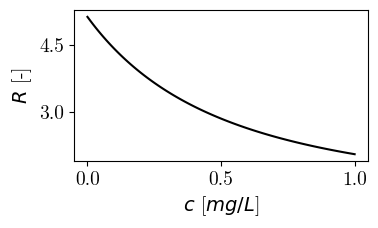

In [ ]:
fig, ax = plt.subplots(figsize=(plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

u_ret = np.load(output_dir / "default_finn/u_ret.npy")
ax.plot(u_ret, np.load(output_dir / f"default_finn/retardation_{analytical_retardation_type}.npy"), "k-", label=analytical_retardation_type.capitalize())
if analytical_retardation_type == "freundlich":
    ax.set_ylim(3, 5)
plotting.set_retardation_axes_stuff(ax, set_xlabel=True, set_ylabel=True)
plt.tight_layout()
plotting.savefig(fig, image_output_dir / f"{analytical_retardation_type}")
plt.show()

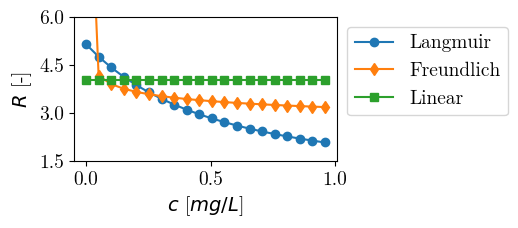

In [49]:
fig, ax = plt.subplots(figsize=(1.35*plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

u_ret = np.load(output_dir / "default_finn/u_ret.npy")
for i, analytical_retardation_type_ in enumerate(["langmuir", "freundlich", "linear"]):
    y = np.load(output_dir / f"default_finn/retardation_{analytical_retardation_type_}.npy")
    ax.plot(u_ret[::5], y[::5], "-", marker=["o", "d", "s"][i], label=analytical_retardation_type_.capitalize())
ax.set_ylim(1.5, 6)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plotting.set_retardation_axes_stuff(ax, set_xlabel=True, set_ylabel=True)
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "parametric_isotherms")
plt.show()

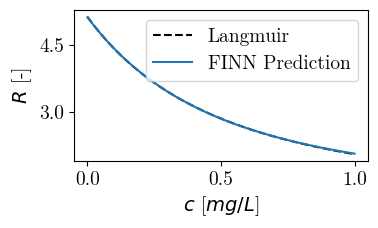

In [55]:
fig, ax = plt.subplots(figsize=(plotting.FIGURE_WIDTH, plotting.FIGURE_HEIGHT))

ret_target = np.load(output_dir / f"default_finn/retardation_{analytical_retardation_type}.npy")
ret_pred = np.load(output_dir / "default_finn/predicted_retardations/retPred_100.npy")

ax.plot(u_ret, ret_target, "k--", label=analytical_retardation_type.capitalize())
ax.plot(u_ret, ret_pred, "-", label="FINN Prediction")

plotting.set_retardation_axes_stuff(ax, set_xlabel=True, set_ylabel=True)
if analytical_retardation_type == "freundlich":
    ax.set_ylim(3, 5)
ax.legend()
plt.tight_layout()
plotting.savefig(fig, image_output_dir / "learned_retardation")
plt.show()

# 3PINN on C

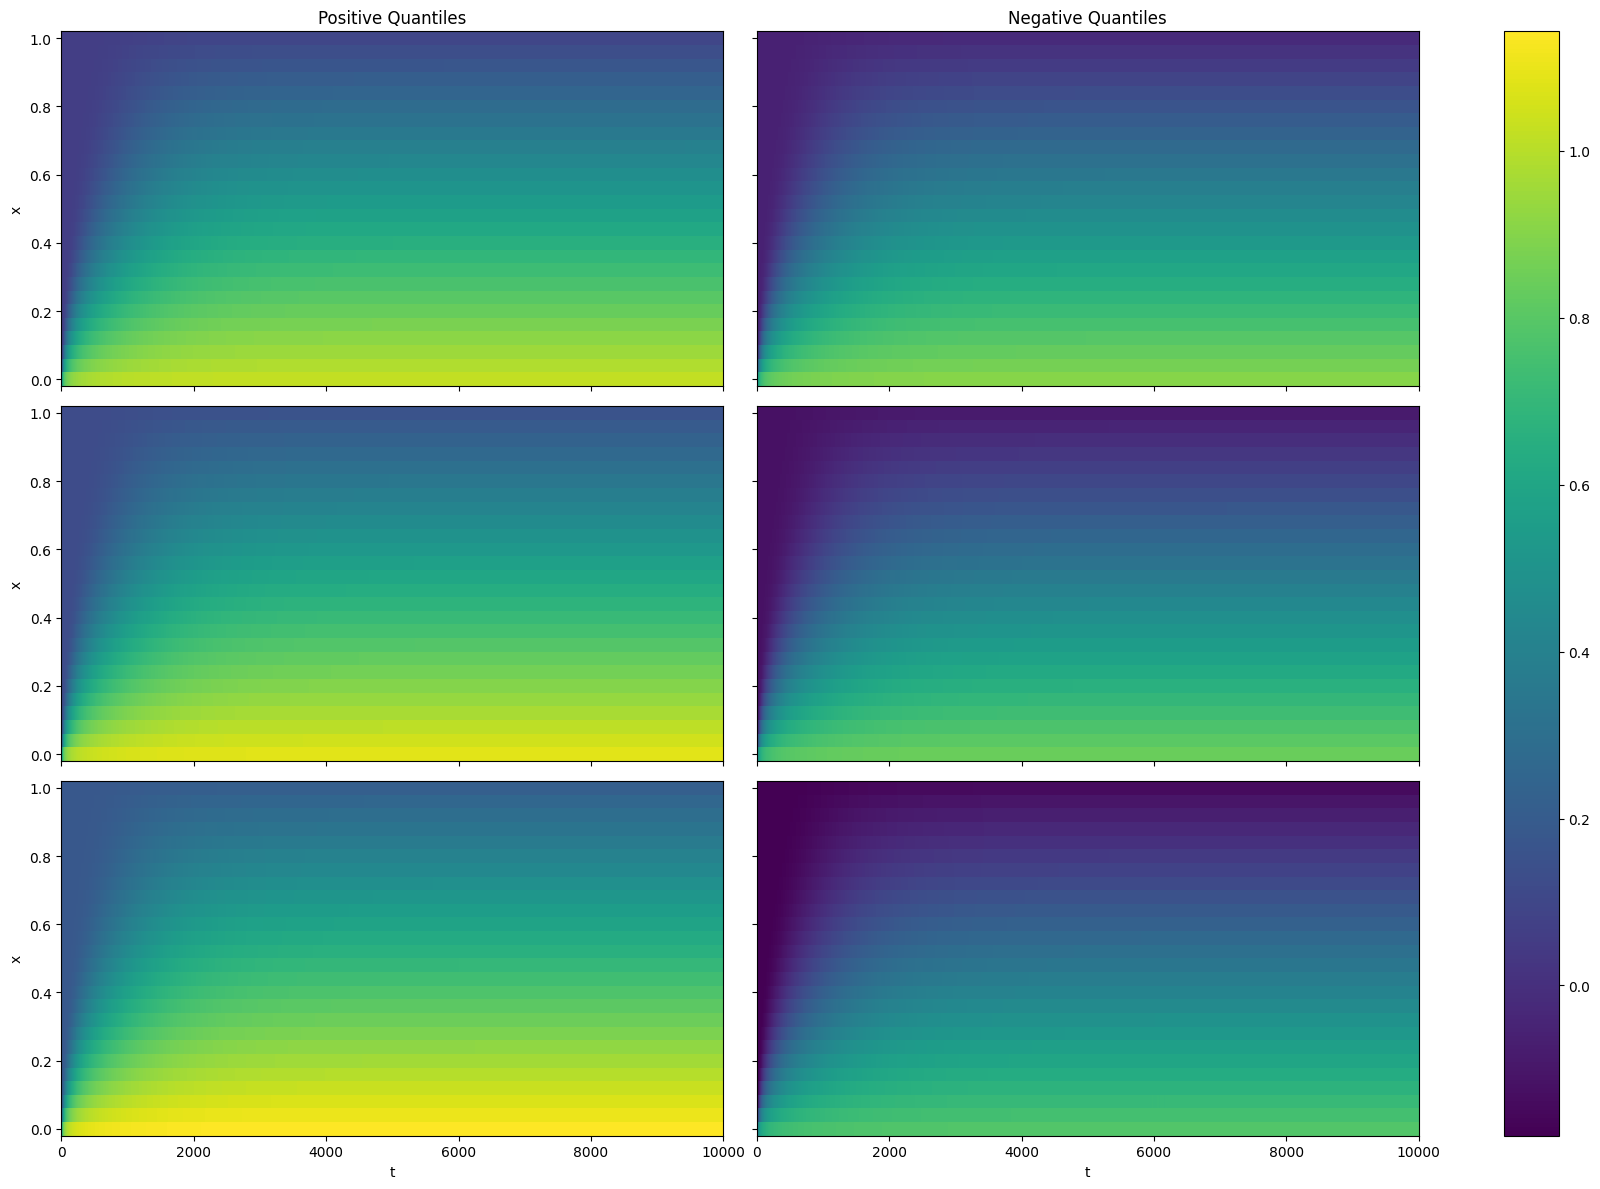

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12), sharex=True, sharey=True)

all_pcolors = []


fac = 0.3
vmin = np.min(concentration_full[:, 0, :] - 0.6*fac)
vmax = np.max(concentration_full[:, 0, :] + 0.6*fac)

# pos quantiles
all_pcolors.append(axs[0, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.2*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[1, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.4*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[2, 0].pcolormesh(t, x, concentration_full[:, 0, :].T + 0.6*fac, cmap="viridis", vmin=vmin, vmax=vmax))

# neg quantiles
all_pcolors.append(axs[0, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.2*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[1, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.4*fac, cmap="viridis", vmin=vmin, vmax=vmax))
all_pcolors.append(axs[2, 1].pcolormesh(t, x, concentration_full[:, 0, :].T - 0.6*fac, cmap="viridis", vmin=vmin, vmax=vmax))

axs[0,0].set_title("Positive Quantiles")
axs[0,1].set_title("Negative Quantiles")
axs[2,0].set_xlabel("t")
axs[2,1].set_xlabel("t")
axs[0,0].set_ylabel("x")
axs[1,0].set_ylabel("x")
axs[2,0].set_ylabel("x")

# Create a colorbar for all pcolormesh plots.
plt.tight_layout()
fig.colorbar(all_pcolors[0], ax=axs, orientation='vertical')#, fraction=0.025, pad=0.04)
fig.savefig(image_output_dir / "c_quantiles.png")

plt.show()

In [15]:
160*concentration_full[:520, 0, -1].std(), 160*concentration_full[:520, 0, -1].mean()

(2.0118334889411926, 2.7041229605674744)

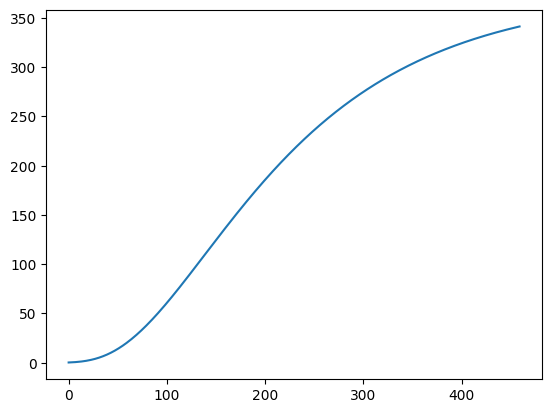

In [16]:
# plt.plot(160*concentration_full[:520, 0, -2])
# plt.plot(concentration_full[:520, 0, -1])
plt.plot(10000*concentration_full[60:520, 0, -1])
# plt.plot(np.log(concentration_full[50:520, 0, -1]))
# plt.hlines(1e-5, 0, 520, "k")
# plt.semilogy(concentration_full[10:520, 0, -1])
plt.show()

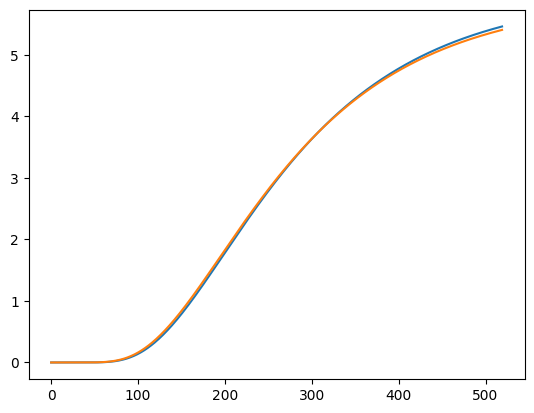

In [17]:
# plt.plot(160*concentration_full[:520, 0, -2])
plt.plot(160*concentration_full[:520, 0, -1])
plt.plot(160*concentration_full[:520, 0, -2] - 160*concentration_full[:520, 0, -1])
plt.show()

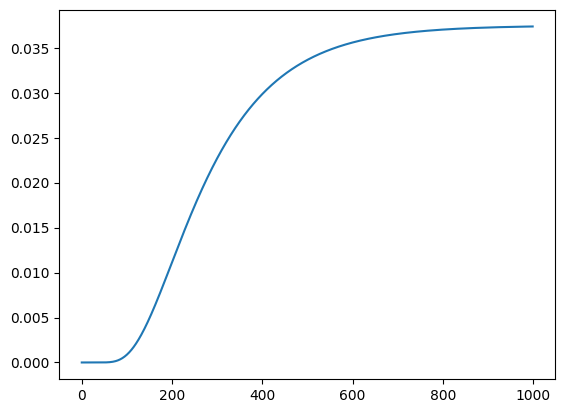

In [18]:
plt.plot(concentration_full[:1000, 0, -1])
plt.show()

# Measurement error
stddev = 5% of measurement mean

In [19]:
concentration_full.shape

(2001, 2, 26)

In [22]:
print(concentration_full[:, :, :].mean() * 0.05)
print(concentration_full[:, 0, :].mean() * 0.05)
print(concentration_full[:, 1, :].mean() * 0.05)

0.04468719363212586
0.02317081391811371
0.06620357036590577


In [23]:
import numpy as np
rng = np.random.default_rng()
noise = rng.normal(loc=0, scale=[1, 100, 0.001])
noise.shape
noise

array([ 1.43758992e+00, -1.55901416e+02, -8.24721998e-04])

# Experimental Data

In [24]:
from dataclasses import dataclass
from pathlib import Path

import numpy as np
import pandas as pd

@dataclass
class ExperimentalData:
    t: np.ndarray
    c_measured: np.ndarray


def read_conf_dataframe(file_path) -> pd.DataFrame:
    df = pd.read_excel(file_path, sheet_name=1, index_col=None, header=None).dropna(how="all")
    df.columns = ["label", "value", "unit"]
    df = df.drop(columns="unit").reset_index(drop=True)
    df = df.T.reset_index(drop=True)
    df.columns = df.iloc[0].tolist()
    df = df.drop(0, axis=0).reset_index(drop=True).astype(float)
    return df

def read_experimental_data(file_path) -> pd.DataFrame:
    df_measured = pd.read_excel(file_path, sheet_name=0, index_col=None, header=None).astype(float)
    df_measured.columns = ["t", "c"]  # TODO: Which concentration?

    df_simulated = pd.read_excel(file_path, sheet_name=2, index_col=None, header=None).astype(float)
    df_simulated.columns = ["t", "c"]  # TODO: Which concentration?
    
    # assert np.array_equal(df_simulated["t"], df_measured["t"])
    print(np.abs(df_simulated["t"] - df_measured["t"]).max())

    df_conf = read_conf_dataframe(file_path)
    # df_conf["t"] = None
    # df_conf.at[0, "t"] = df_measured["t"].tolist()
    # df_conf["c_simulated"] = None
    # df_conf.at[0, "c_simulated"] = df_simulated["c"].tolist()
    # df_conf["c_measured"] = None
    # df_conf.at[0, "c_measured"]= df_measured["c"].tolist()
    # df_conf = df_conf.explode(["t", "c_simulated", "c_measured"]).reset_index(names="experiment_ID")
    # df_conf["t"] = df_conf["t"].astype(float)
    # df_conf["c_measured"] = df_conf["c_measured"].astype(float)
    # df_conf["c_simulated"] = df_conf["c_simulated"].astype(float)

    conf = {k: v[0] for k,v in df_conf.to_dict().items()}
    conf["Nx"] = int(conf["Nx"])
    conf["Nt"] = int(conf["Nt"])
    return conf, df_measured["t"].to_numpy(), df_measured["c"].to_numpy(), df_simulated["c"].to_numpy()

base_dir = Path("../data/experimental_data/")
conf, t, c_measured, c_simulated = read_experimental_data(base_dir / "data_core2_long.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '../data/experimental_data/data_core2_long.xlsx'

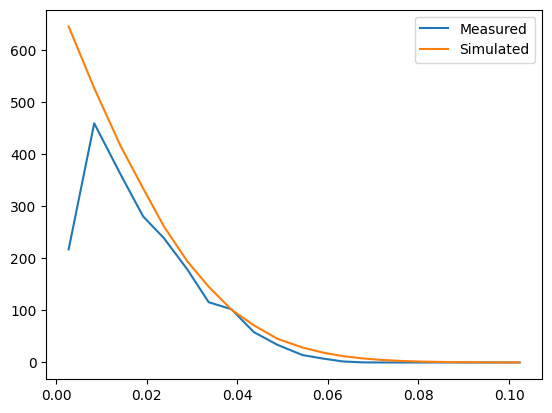

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, c_measured, label="Measured")
plt.plot(t, c_simulated, label="Simulated")
plt.legend()
plt.show()